<a href="https://colab.research.google.com/github/henrique-fes/mvp_analise_de_dados_pos_puc/blob/main/mvp_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Definição do Problema**

## **1.1 Qual é a descrição do problema?**

Uma empresa está gastando muitos recursos (tempo, dinheiro e esforço) com campanhas mal direcionadas de marketing e promovendo produtos sem uma estratégia eficaz, como resultado essas estão tendo uma baixa conversão e diminuindo a margem da empresa. Foi levantado uma base de dados de clientes para realizar uma análise para agrupa-los em segmentos úteis e criar estratégias mais eficazes para impulsionar as vendas.

O problema é identificar e segmentar os clientes de acordo com seus comportamentos de compra, características demográficas e interação com promoções e canais de venda. O objetivo é ajudar a empresa a melhorar suas estratégias de vendas, marketing direcionado e retenção de clientes, otimizando os recursos gastos (tempo, dinheiro e esforço) para os diferentes segmentos de clientes.

Ao final da análise é esperado que as seguintes questões sejam respondidas:

* Quais segmentações podem ser feitas entre os clientes com base em fatores como gastos, interações com campanhas, e canais de compra?
* Qual segmento de clientes traz maior retorno para a empresa?
* Com base nesses segmentos, como otimizar as campanhas de marketing de forma personalizada e reduzir esforços desperdiçados?

## **1.2 Este é um problema de aprendizado supervisionado ou não supervisionado?**
Este é um problema de aprendizado não supervisionado, pois o objetivo é realizar uma análise de clustering para identificar grupos de clientes com comportamentos similares sem a necessidade de rótulos previamente definidos.

## **1.3 Que premissas ou hipóteses você tem sobre o problema?**
* Existem segmentos de clientes distintos: acredita-se que alguns clientes compram com base em promoções, enquanto outros preferem qualidade ou conveniência.

* Os comportamentos passados indicam tendências futuras: presume-se que os hábitos de compra, renda e aceitação de promoções sejam estáveis ao longo do tempo.

* Existem segmentos de clientes distintos: acredita-se que alguns clientes compram com base em promoções, enquanto outros preferem qualidade ou conveniência.

## **1.4 Defina cada um dos atributos do dataset.**

### Atributos

#### Dados Pessoais

* ID: Identificador único do cliente
* Year_Birth: Ano de nascimento do cliente
* Education: Nível de escolaridade do cliente
* Marital_Status: Estado civil do cliente
* Income: Renda anual familiar do cliente
* Kidhome: Quantidade de crianças no domicílio do cliente
* Teenhome: Quantidade de adolescentes no domicílio do cliente
* Dt_Customer: Data de adesão do cliente à empresa
* Recency: Número de dias desde a última compra feita pelo cliente
* Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

#### Produtos

* MntWines: Valor gasto em vinhos nos últimos 2 anos
* MntFruits: Valor gasto em frutas nos últimos 2 anos
* MntMeatProducts: Valor gasto em carnes nos últimos 2 anos
* MntFishProducts: Valor gasto em peixes nos últimos 2 anos
* MntSweetProducts: Valor gasto em doces nos últimos 2 anos
* MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos

#### Campanhas e Promoções

* NumDealsPurchases: Número de compras feitas com desconto
* AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

#### Canal de Vendas

* NumWebPurchases: Número de compras feitas através do site da empresa
* NumCatalogPurchases: Número de compras feitas através de catálogo
* NumStorePurchases: Número de compras feitas diretamente nas lojas
* NumWebVisitsMonth: Número de visitas ao site da empresa no último mês


# **2. Análise de dados**


Importando as bibliotecas que serão utilizadas durante todo o processo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Importando o dataset

In [2]:
url_dataset = 'https://raw.githubusercontent.com/henrique-fes/mvp_analise_de_dados_pos_puc/refs/heads/main/marketing_campaign.csv'
data = pd.read_csv(url_dataset,sep = '\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## **2.1 Estatísticas Descritivas**

Quantos atributos e instâncias existem?



In [3]:
print(f'Shape da base de dados: {data.shape}')
print(f'Instâncias: {data.shape[0]}')
print(f'Atributos: {data.shape[1]}')

Shape da base de dados: (2240, 29)
Instâncias: 2240
Atributos: 29


Verificando as primeiras e as últimas linhas do dataset.

In [4]:
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [5]:
data.tail(10)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2230   7004        1984  Graduation         Single   11012.0        1   
2231   9817        1970      Master         Single   44802.0        0   
2232   8080        1986  Graduation         Single   26816.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   
2234   8372        1974  Graduation        Married   34421.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2238   8235        1956      Master       Together   69245.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2230         0  16-03-2013       82        24  ...                  9   
2231         0  21-08-2012       71       853  ...                  8   
2232         0  17-08-2012       50         5  ...                  4   
2233         0  02-06-2013       23         9  ...                  6   
2234         0  01-07-2013       81         3  ...                  7   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2230             1             0             0             0             0   
2231             0             0             0             0             0   
2232             0             0             0             0             0   
2233             0             0             0             0             0   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2230         0              3         11         0  
2231         0              3         11         0  
2232         0              3         11         0  
2233         0              3         11         0  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[10 rows x 29 columns]

Checando quais são os tipos de dados dos atributos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Verificando se há valores nulos, duplicados ou inconsistentes

In [7]:
 null_values = data.isnull().sum()
 null_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
if data.duplicated().any():
  print(f'Existem valores duplicados na base de dados.')
else:
  print(f'Sem valores duplicados na base de dados.')

Sem valores duplicados na base de dados.


In [9]:
data["Z_CostContact"].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [10]:
data["Z_Revenue"].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

Trazendo um resumo estatístico dos atributos numéricos como contagem de linhas, média, desvio padrão, mínimo e máximo e os quartis

In [11]:
df= data.describe()
df

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

Analisando os dados inicialmente, percebemos que serão necessárias alguns tratamento e limpeza:


1.   Há 24 valores faltantes de "Income" que seria o salário, o que corresponde a 1,08*% dos dados, o que é bem baixo, e consideramos retirar essas linhas para não ter que subsitituir pela média ou mediana, sem risco de adicionar ruídos ou viéses à análise.
2. Retirar Colunas desnecessárias para a análise como: "Z_Revenue" e "Z_CostContact"
3. As colunas categóricas iremos transformar em numéricas
4. Retirar Outliers das colunas "Income" e "Year_Birth"



In [12]:
antes = data.shape[0]
data = data.dropna(subset=['Income'])
depois = data.shape[0]
print(f"Linhas removidas: {antes - depois}")

Linhas removidas: 24


In [13]:
df= data.describe()
df

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### 1.Insights Gerais sobre o Perfil dos Clientes

#### 1.1 Idade dos Clientes (Year_Birth):

Idade média dos clientes: aproximadamente 56 anos (com base no ano médio de nascimento, 1968).
Estratégia:
Oferecer produtos premium ou regulares relacionados a estilo de vida, como vinhos e alimentos finos.
Segmentação por faixa etária para adaptar campanhas específicas (ex.: promoções para clientes mais velhos que valorizam conveniência, ou mais jovens que buscam novidades).

#### 1.2. Distribuição de Renda (Income):

Renda média: 52.247,25.
Grande amplitude (mínimo: 1.730,00; máximo: 666.666,00), indicando clientes de perfis econômicos distintos.
Realizar um tratamento de outlier para melhorar a distribuição

#### 1.3. Presença de Filhos e Adolescentes no Lar (Kidhome, Teenhome):

Muitos clientes não têm filhos ou adolescentes em casa:
Mediana é 0 para ambas as variáveis (Kidhome e Teenhome).
Apenas 25% ou mais possuem pelo menos 1 filho ou adolescente.

### 2.Insights sobre o Comportamento de Compra

#### 2.1 Gasto em Diferentes Produtos (MntWines, MntFruits, etc.):

Produtos mais consumidos: Vinhos, seguidos por carnes.
Média de gasto com vinhos: 305,09 e máximo: 1.493. Isso sinaliza que o vinho é um produto forte na estratégia da empresa.
Menores valores em frutas (26,35) e doces (valores médios baixos): Estes produtos representam mercados potenciais para crescimento.

#### 2.2 Número de Compras com Descontos (NumDealsPurchases):

Média de 2 compras por descontos.
Mostra que as promoções são utilizadas moderadamente, mas não são o maior fator determinante.
Estratégia:
Focar na personalização das promoções ao invés de descontos gerais (ex.: estudo de comportamento e preferências de segmentos).

### 3.Insights sobre as Campanhas de Marketing

#### 3.1 Baixa aceitação geral das campanhas (AcceptedCmp1 - AcceptedCmp5):

As taxas médias de aceitação de campanhas anteriores estão todas abaixo de 0,075 (7,5%).
Apenas poucos clientes engajam com campanhas.

#### 3.2 Reclamações (Complain):

Apenas 0,95% dos clientes fizeram reclamações.

## **2.2 Visualização**

Analisando a distribuição de Atributos categóricos para identificar alguma possível necessidade de tratamento

In [14]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [16]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Utilizando a visualização em box splot vamos analisar o comportamento e presença de outliers nas categorias de Renda e Nascimento dos clientes.


In [17]:
plt.figure(figsize=(15, 5))

# Boxplot para 'Income'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Income'], color='skyblue')
plt.title("Boxplot da Renda")
plt.ylabel("Income")

# Boxplot para 'Year_Birth'
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Year_Birth'], color='lightgreen')
plt.title("Boxplot de Ano de Nascimento")
plt.ylabel("Year of Birth")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Renda')

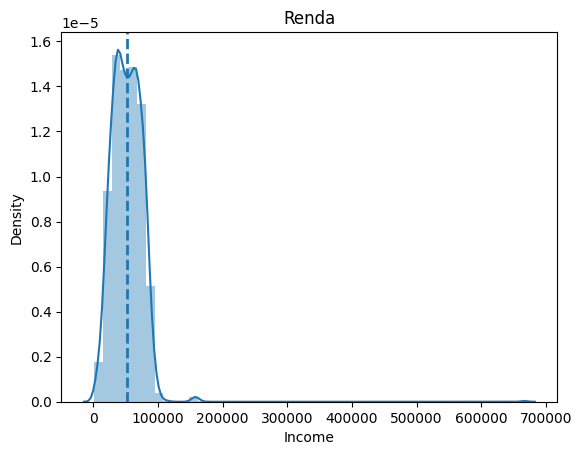

In [18]:
sns.distplot(data['Income'])
plt.axvline(x=data['Income'].mean(), linestyle='--', linewidth=2)
plt.title('Renda')

Text(0.5, 1.0, 'Ano de Nascimento')

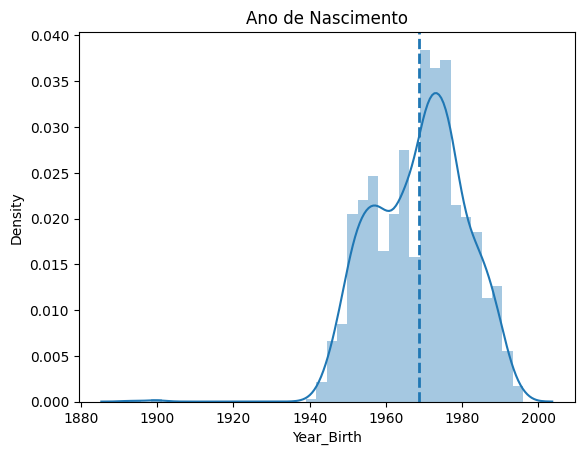

In [19]:
sns.distplot(data['Year_Birth'])
plt.axvline(x=data['Year_Birth'].mean(),linestyle='--', linewidth=2)
plt.title('Ano de Nascimento')

É possível notar gráficos bem deformados o que é indicio forte que os outliers impactam na análise, vamos retira-los no pré processamento dos dados

In [20]:
sns.pairplot(data, vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], hue="Education")

Com o pairplot dos gastos em produtos por nível educacional dos clientes queremos ver se há:


1. clusters bem separados pode indicar que diferentes segmentos de consumidores
possuem padrões únicos de gastos, que podem ser explorados para personalização de estratégia de marketing.

2. Relações entre gastos em produtos diferentes, se há correlações positivas ou negativas entre os produtos Pode indicar estratégias de cross - selling

3. Distribuição dos gastos para cada nível

<Axes: >

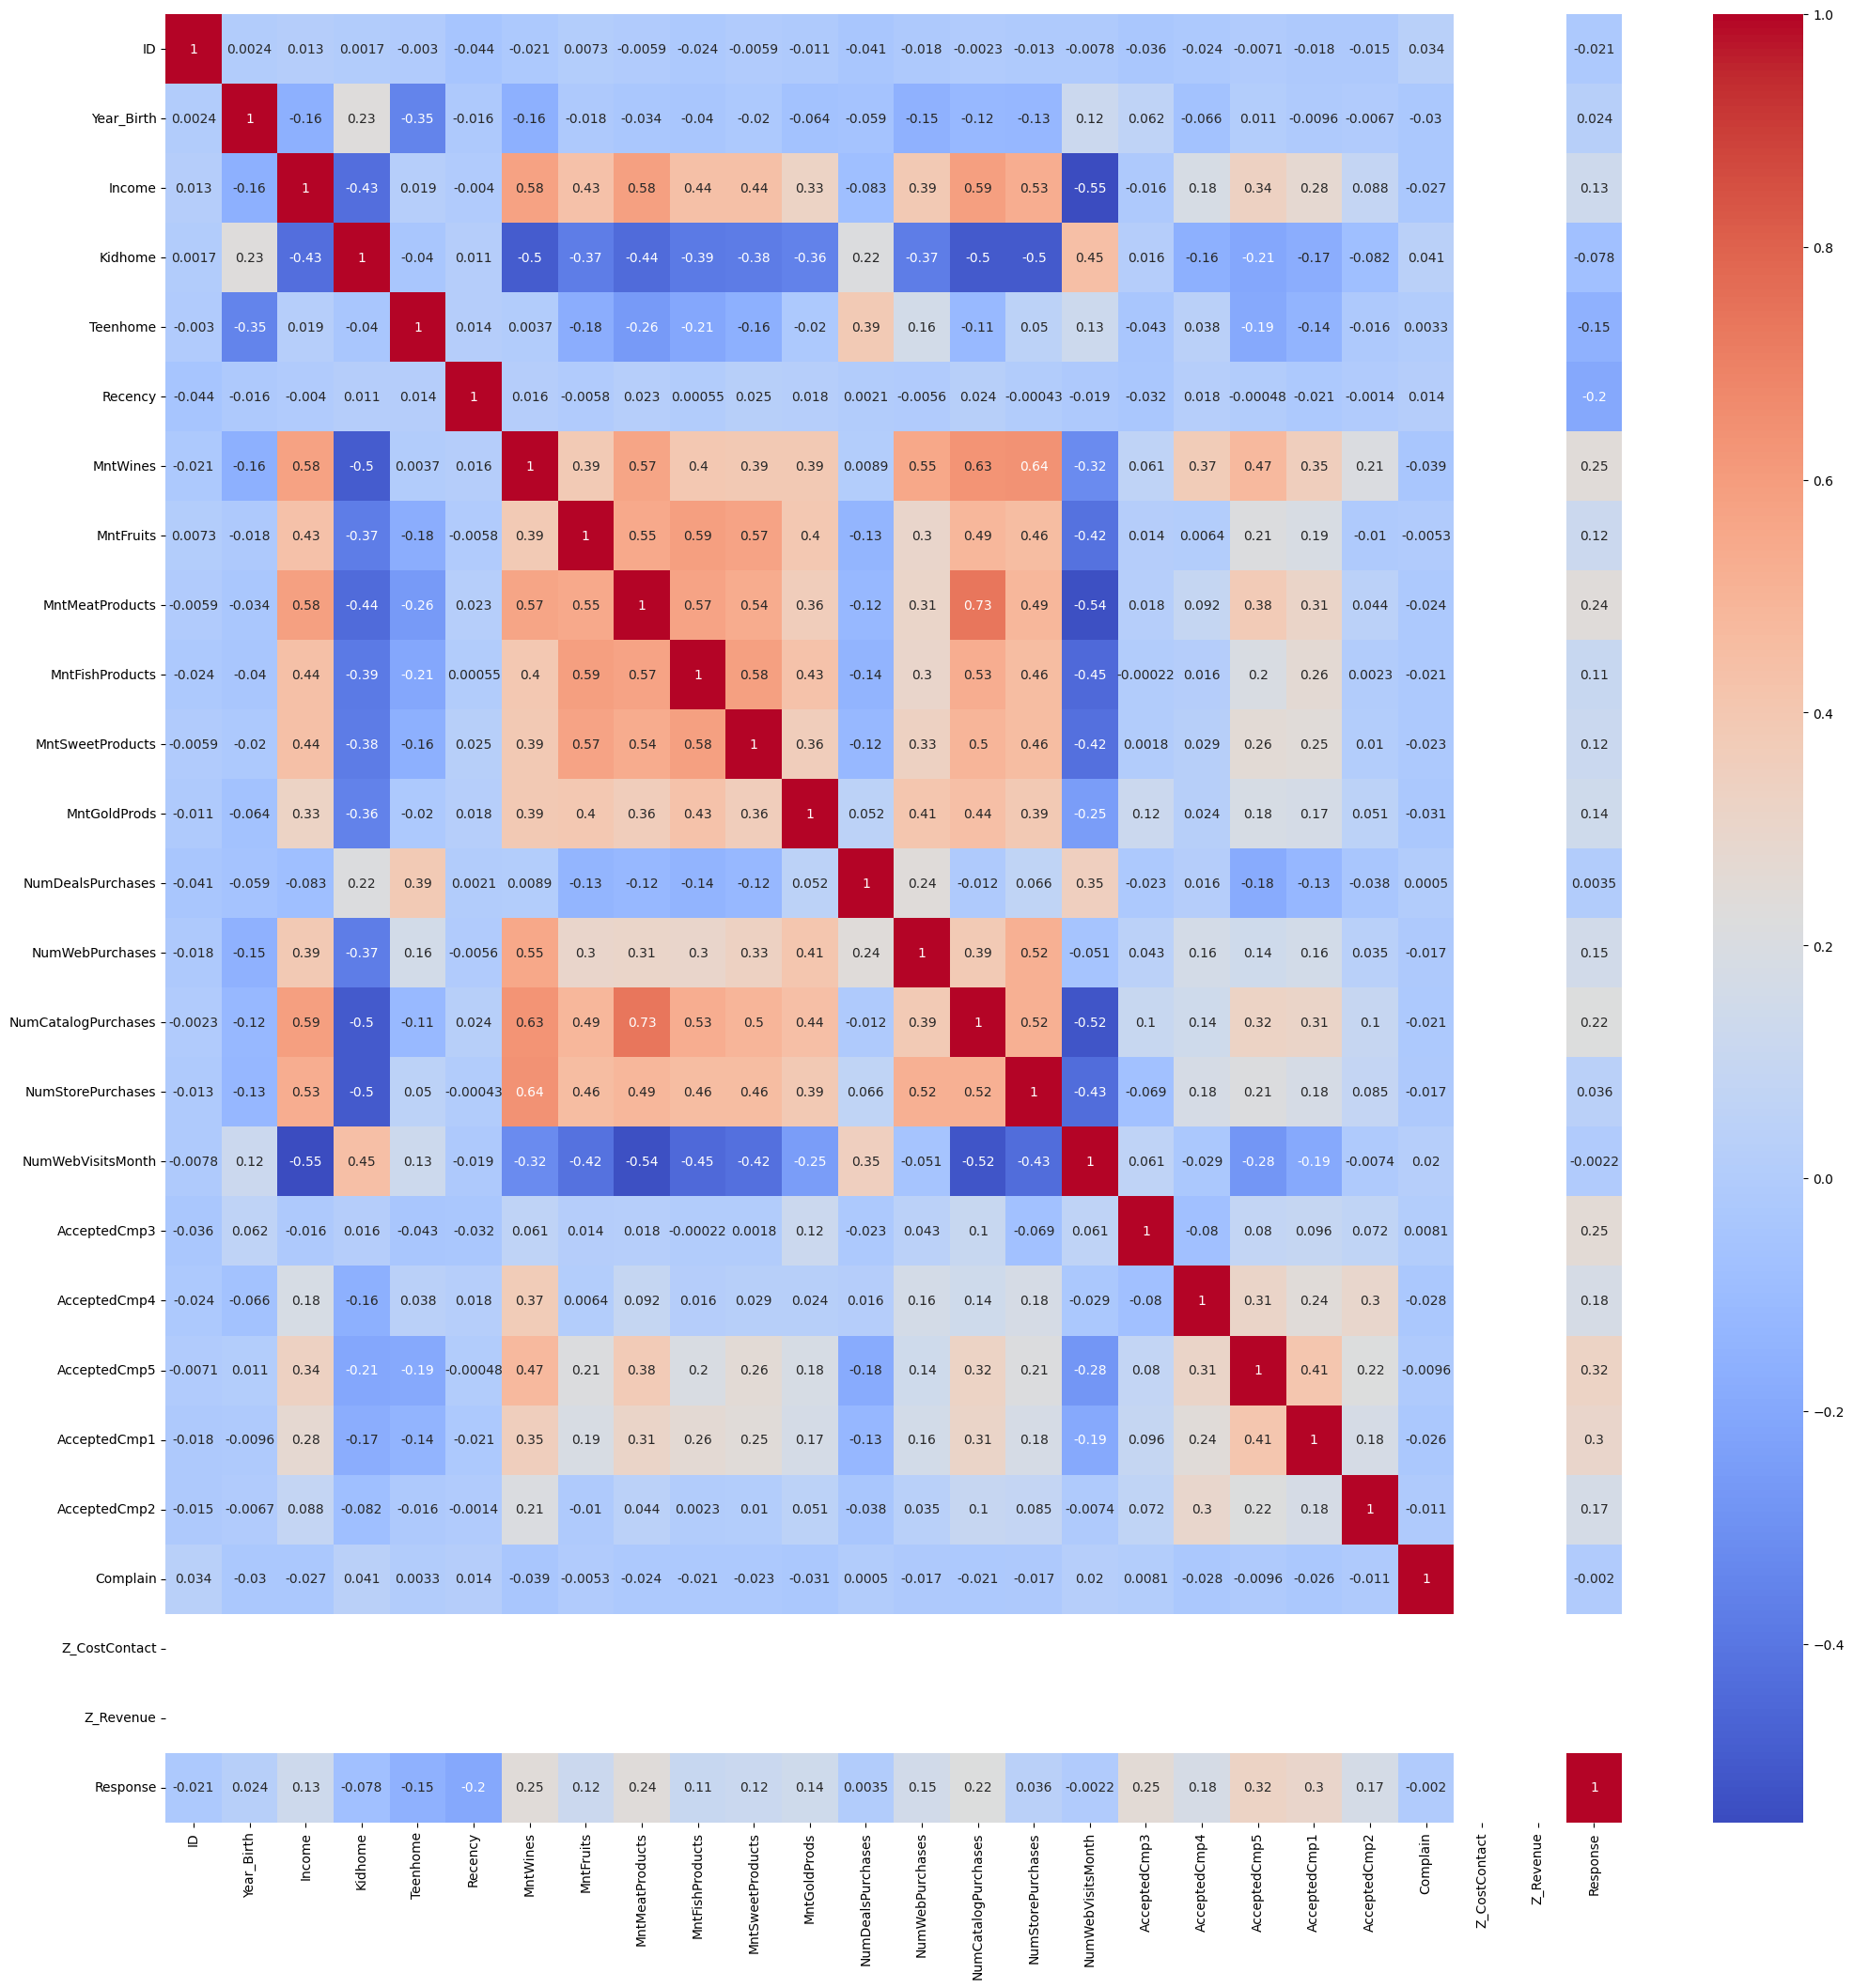

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(data.select_dtypes('number').corr(),cmap='coolwarm',annot=True)

Com o heatmap de correlação conseguimos identificar:

1. Identificação de relações fortes (positivas ou negativas): Útil para entender padrões de comportamento.
2. Redução de dimensionalidade: Variáveis fortemente relacionadas podem ser combinadas ou sintetizadas.
3. Grupos ou clusters de variáveis correlacionadas: Essenciais para compreender categorias semelhantes.
4. Preparação para Modelos Preditivos: Focar nas variáveis mais correlacionadas com o alvo.
5. Descoberta de estratégias de negócio, como cross-selling: Variáveis com correlação positiva forte podem sugerir produtos frequentemente comprados juntos.

Utilizando um gráfico de barras veremos o comparativo de canal de vendas

In [22]:
somas_canais = {
    'Compras no Site': data['NumWebPurchases'].sum(),
    'Compras por Catálogo': data['NumCatalogPurchases'].sum(),
    'Compras na Loja': data['NumStorePurchases'].sum(),
}
plt.figure(figsize=(8, 6))
plt.bar(somas_canais.keys(), somas_canais.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Total de Compras por Canal de Venda", fontsize=14)
plt.ylabel("Quantidade de Compras", fontsize=12)
plt.xlabel("Canal de Venda", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Com isso vemos que as compras nas lojas ainda representam a maior parte das vendas, assim para a escalada do negócio é importante que as campanhas de marketing consigam focar em segmentos que comprem de outros canais para fortalecer ainda mais o negócio

# **3.Pré-processamento de dados**

### 3.1 Redução de Dimensionalidade
Começar o pré processamento de dados excluindo as colunas que são irrelevantes para o nosso modelo.

In [23]:
data_dropar = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"]
data = data.drop(data_dropar, axis=1)

### 3.2 Remoção de Outliers

A remoção de outliers é muito importante no pré-processamento de dados, especialmente em tarefas de clustering. Isso ocorre porque os outliers podem impactar negativamente a formação dos clusters, tornando os resultados menos precisos ou representativos.

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil (IQR)

    # Limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar dados dentro dos limites
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remover outliers para 'Income' e 'Year_Birth'
df_cleaned = remove_outliers(data, 'Income')
df_cleaned = remove_outliers(df_cleaned, 'Year_Birth')

In [25]:
print("O total de registros depois de remover os outliers ficou:", len(df_cleaned))

O total de registros depois de remover os outliers ficou: 2205


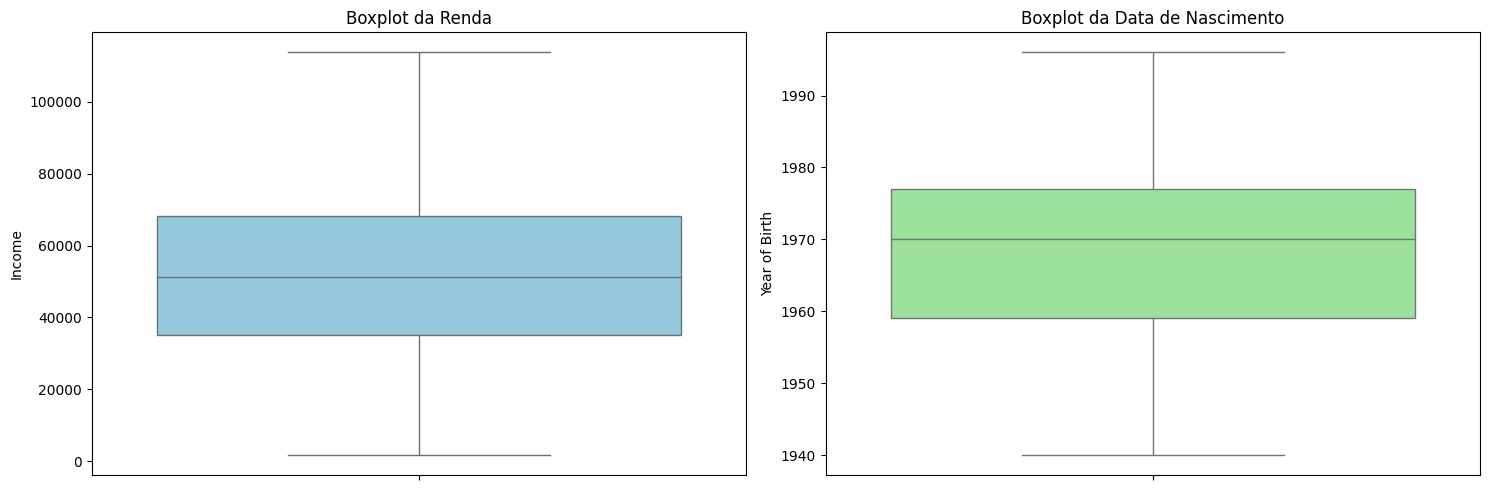

In [26]:
plt.figure(figsize=(15, 5))

# Boxplot para 'Income'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Income'], color='skyblue')
plt.title("Boxplot da Renda")
plt.ylabel("Income")

# Boxplot para 'Year_Birth'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Year_Birth'], color='lightgreen')
plt.title("Boxplot da Data de Nascimento")
plt.ylabel("Year of Birth")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Renda')

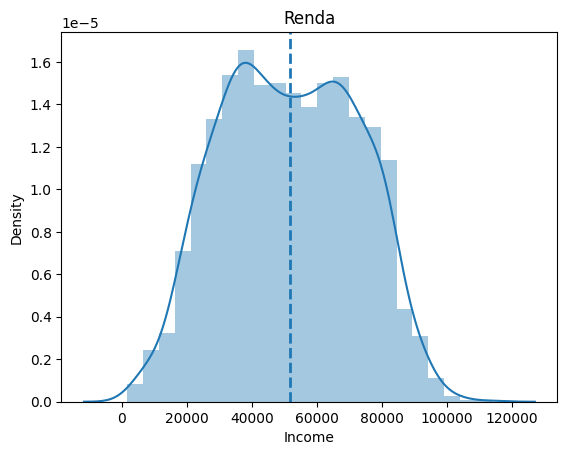

In [27]:
sns.distplot(df_cleaned['Income'])
plt.axvline(x=df_cleaned['Income'].mean(), linestyle='--', linewidth=2)
plt.title('Renda')

Text(0.5, 1.0, 'Data de Nascimento')

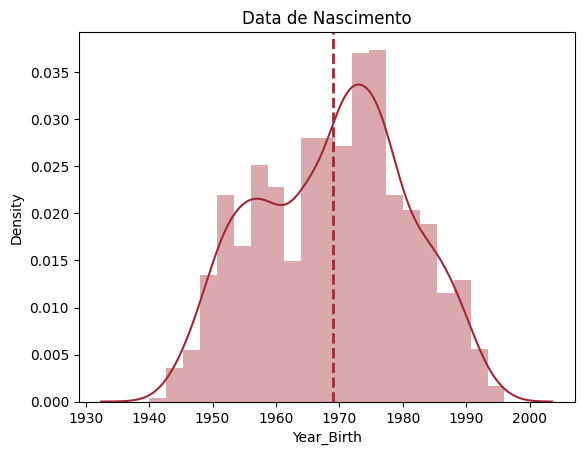

In [28]:
sns.distplot(df_cleaned['Year_Birth'],color="#a02933")
plt.axvline(x=df_cleaned['Year_Birth'].mean(), color="#a02933", linestyle='--', linewidth=2)
plt.title('Data de Nascimento')

<Axes: >

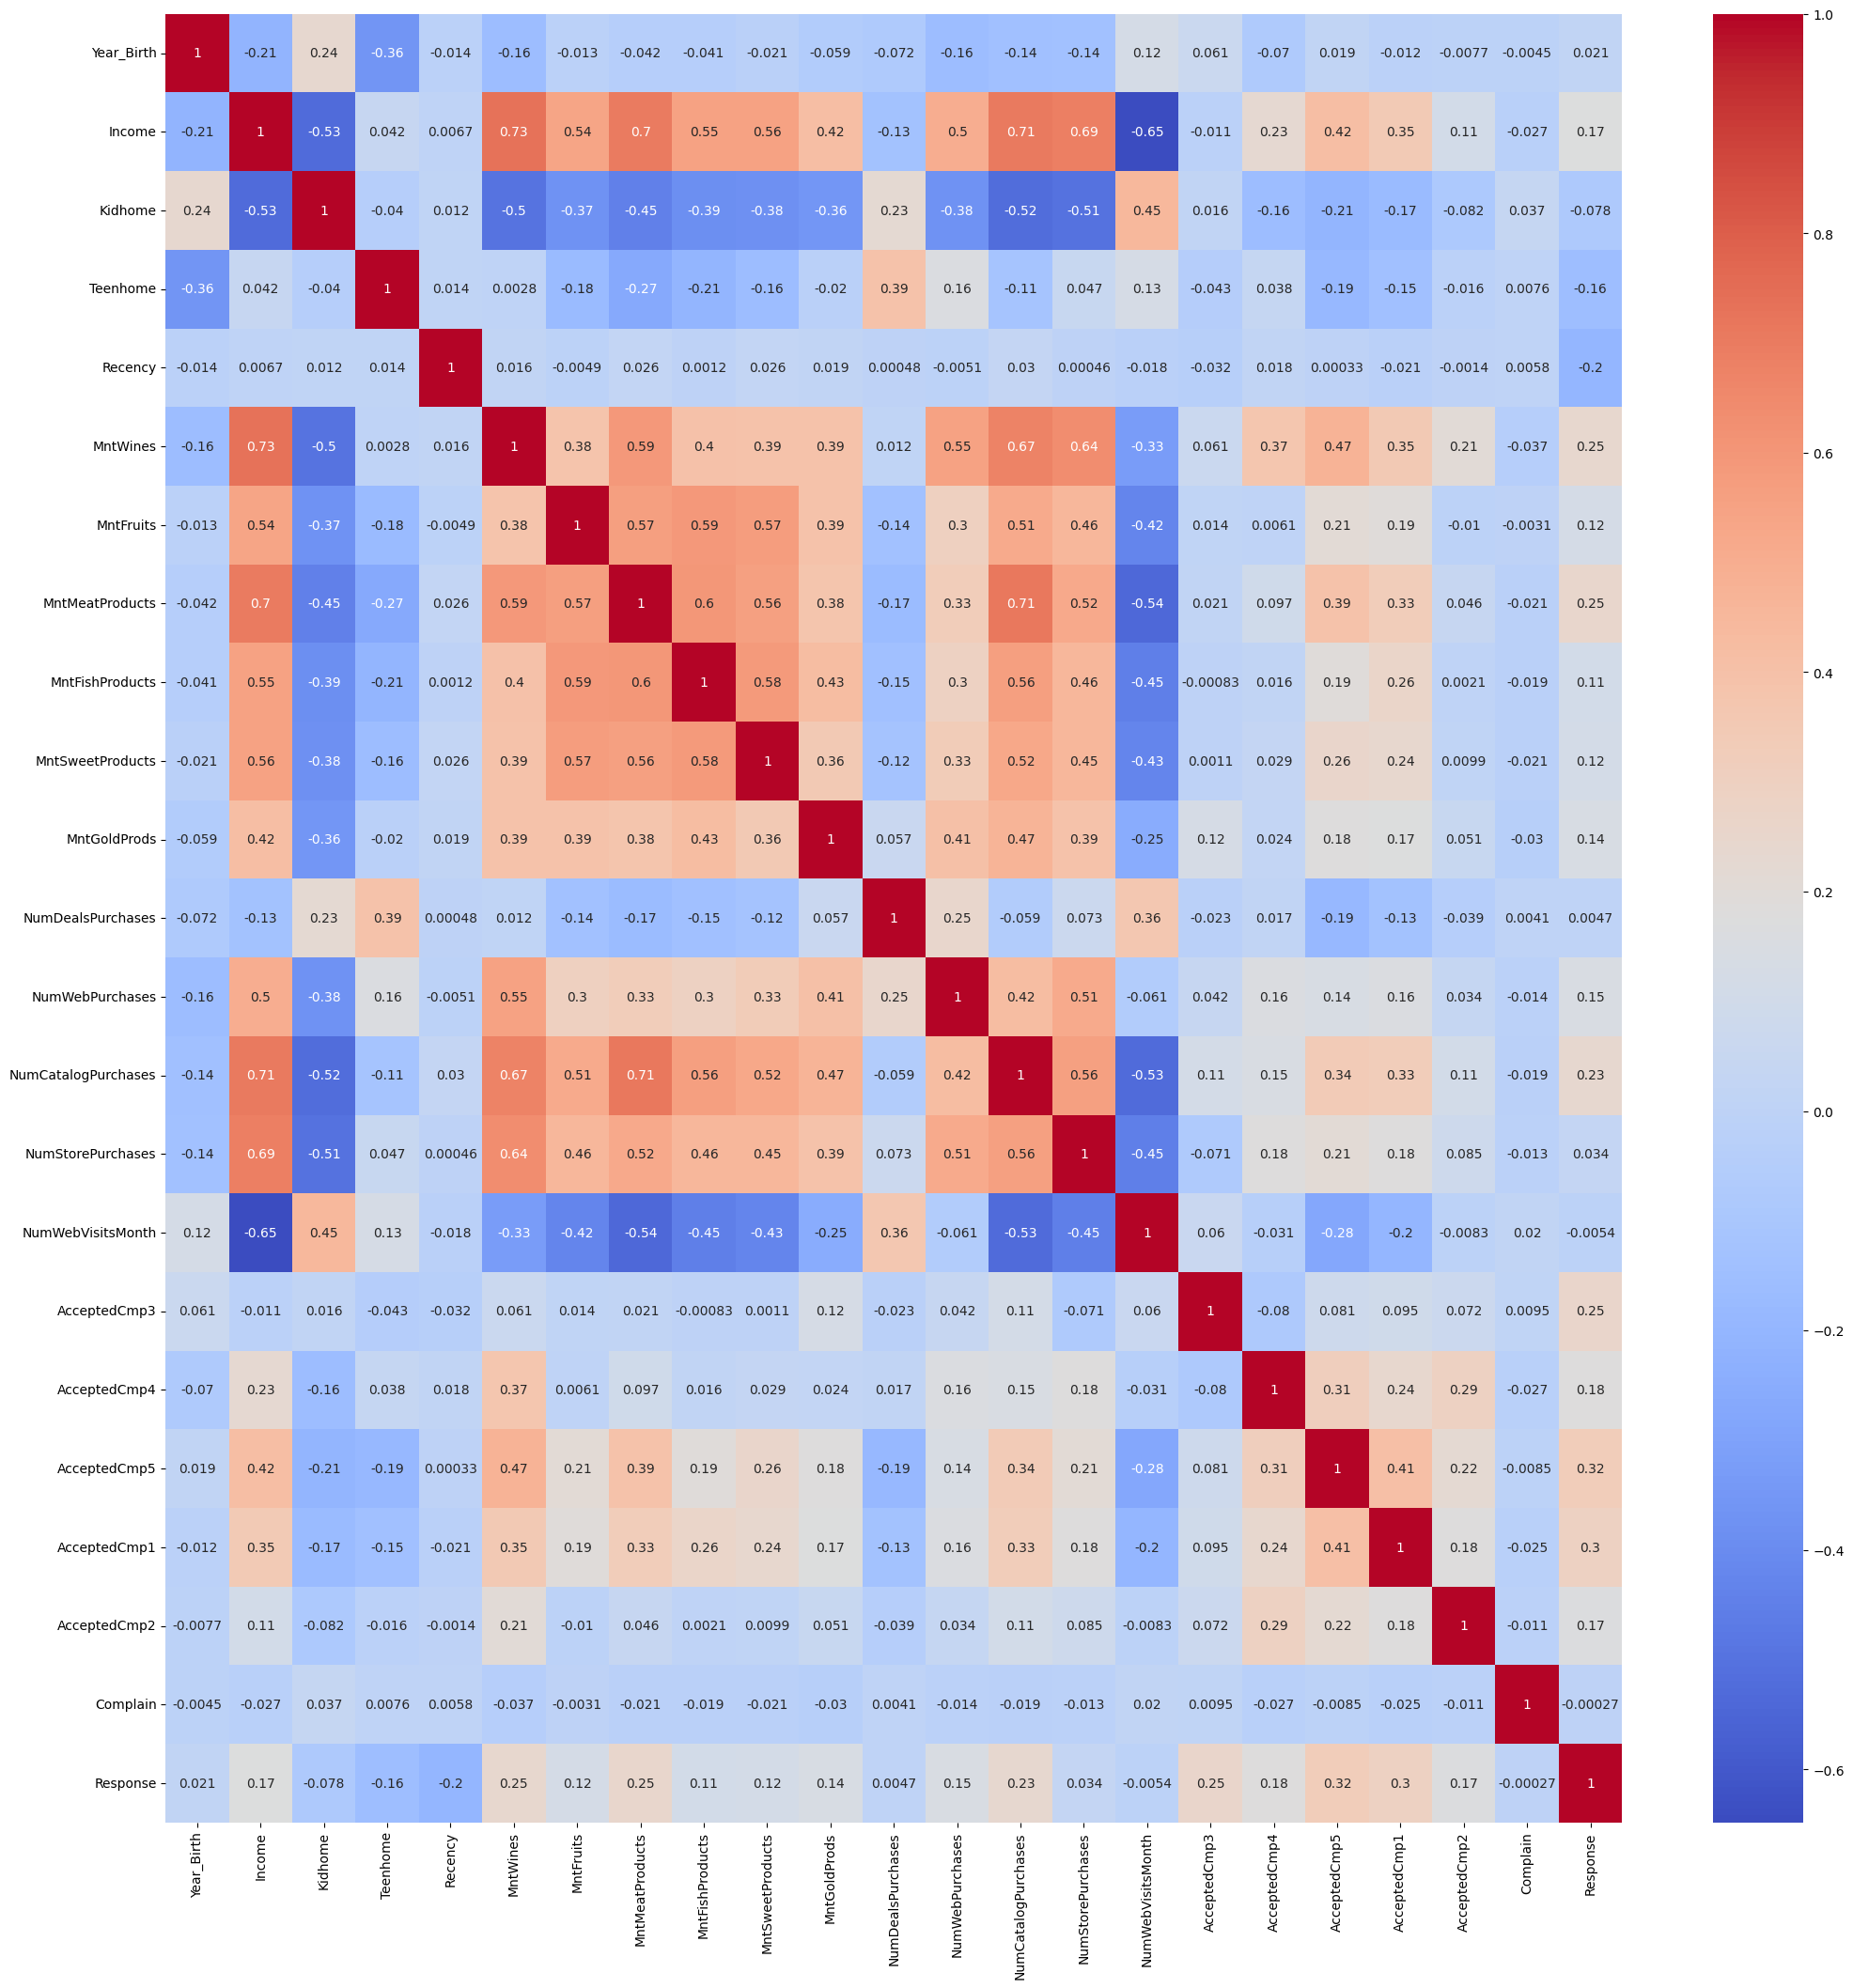

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(df_cleaned.select_dtypes('number').corr(),cmap='coolwarm',annot=True)

In [30]:
sns.pairplot(df_cleaned, vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], hue="Marital_Status")

### 3.3 Transformando atributos categóricos em numéricos

Transformar dados categóricos em numéricos é uma etapa essencial no pré-processamento de dados porque a maioria dos algoritmos de aprendizado de máquina e análise estatística trabalham com valores numéricos.


In [31]:
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)

df_cleaned['Marital_Status'].value_counts()

Marital_Status
1    1422
0     783
Name: count, dtype: int64

In [32]:
LE=LabelEncoder()
df_cleaned['Education']=df_cleaned[['Education']].apply(LE.fit_transform)

Utilizando o Label Enconder pois os dados possuem valores ordinais em que a ordem é importante, ou seja, Basic < Graduation

In [33]:
new_df= df_cleaned.copy()

In [34]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
new_df = new_df.drop(cols_del, axis=1)

### 3.4 Padrozinação
O uso do StandardScaler nas colunas de atributos numéricos é uma etapa crucial no pré-processamento de dados. Ele padroniza os dados, ou seja, transforma os valores de cada coluna numérica para que tenham média = 0 e desvio padrão = 1. Essa transformação é especialmente importante para algoritmos de aprendizado de máquina e clustering que dependem de cálculos de distância ou magnitudes.

In [35]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df),columns= new_df.columns )
print("All features are now scaled")

All features are now scaled


In [36]:
print("The shape of new data is ",scaled_df.shape)

The shape of new data is  (2205, 18)


### 3.5 PCA
O PCA (Principal Component Analysis) é uma técnica de Redução de Dimensionalidade que vamos aplicadr no conjunto de dados já padronizado para condensar informações e diminuir o número de variáveis. Isso é útil para simplificar o modelo, melhorar o desempenho em algoritmos e facilitar as visualizações.

In [37]:
pca = PCA(n_components=0.95)
pca.fit(scaled_df)
pca_components = pca.transform(scaled_df)

In [38]:
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

Instanciando o PCA:

PCA(n_components=0.95): Aqui, definimos que queremos preservar 95% da variância total dos dados.
Isso permite à biblioteca automaticamente selecionar o número mínimo necessário de componentes.
Aplicando o PCA:

fit(scaled_df): Ajusta o PCA ao dataset padronizado e transforma as variáveis originais em componentes principais.
Criação de um DataFrame com os Componentes:

Os componentes principais (PC1, PC2, ...) substituem as variáveis originais.
Cada linha do novo DataFrame corresponde aos dados originais projetados nesses componentes.

# **4. Conclusão**

Durante o trabalho passamos por todas as etapas de um pipeline robusto de dados na preparação para o desenvolvimento de um modelo de clusterização. Desde a definição do problema,a análise exploratória e visualização dos dados, identificando padrões, correlações e possíveis inconsistências como outliers, dados faltantes e colunas redundantes. No pré-processamento, transformamos variáveis categóricas em numéricas com técnicas como binarização e Label Encoding, padronizamos os atributos numéricos usando o StandardScaler e reduzimos a dimensionalidade com PCA, garantindo que os dados estivessem consistentes, equilibrados e prontos para a aplicação de algoritmos.

Com essas etapas concluídas, entregamos um dataset otimizado, livre de redundâncias e preparado para modelos baseados em distância, como K-Means ou DBSCAN. Este projeto entregou qualidade e a integridade dos dados, com uma base sólida para que a próxima etapa consiga trazer insights valiosos, como identificação de padrões e perfis alinhados para campanhas de marketing mais eficazes.